<a href="https://colab.research.google.com/github/pekopeko1/covid-19/blob/master/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

東京都の公式サイト情報からjsonファイル取得

In [0]:
!wget --no-check-certificate --output-document=covid19_tokyo.json 'https://raw.githubusercontent.com/tokyo-metropolitan-gov/covid19/development/data/data.json'

--2020-04-29 23:32:47--  https://raw.githubusercontent.com/tokyo-metropolitan-gov/covid19/development/data/data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1204920 (1.1M) [text/plain]
Saving to: ‘covid19_tokyo.json’

covid19_tokyo.json  100%[===================>]   1.15M  --.-KB/s    in 0.08s   

2020-04-29 23:32:47 (14.0 MB/s) - ‘covid19_tokyo.json’ saved [1204920/1204920]




感染者情報は['patients_summary']['data']にある


In [0]:
import pandas as pd
data = pd.read_json('covid19_tokyo.json')
date_data = []
dc_data = []
for i in range(len(data['patients_summary']['data'])):
    date_data.append(data['patients_summary']['data'][i]['日付'][5:10])
    dc_data.append(data['patients_summary']['data'][i]['小計'])
print(date_data)
print(dc_data)

['01-24', '01-25', '01-26', '01-27', '01-28', '01-29', '01-30', '01-31', '02-01', '02-02', '02-03', '02-04', '02-05', '02-06', '02-07', '02-08', '02-09', '02-10', '02-11', '02-12', '02-13', '02-14', '02-15', '02-16', '02-17', '02-18', '02-19', '02-20', '02-21', '02-22', '02-23', '02-24', '02-25', '02-26', '02-27', '02-28', '02-29', '03-01', '03-02', '03-03', '03-04', '03-05', '03-06', '03-07', '03-08', '03-09', '03-10', '03-11', '03-12', '03-13', '03-14', '03-15', '03-16', '03-17', '03-18', '03-19', '03-20', '03-21', '03-22', '03-23', '03-24', '03-25', '03-26', '03-27', '03-28', '03-29', '03-30', '03-31', '04-01', '04-02', '04-03', '04-04', '04-05', '04-06', '04-07', '04-08', '04-09', '04-10', '04-11', '04-12', '04-13', '04-14', '04-15', '04-16', '04-17', '04-18', '04-19', '04-20', '04-21', '04-22', '04-23', '04-24', '04-25', '04-26', '04-27', '04-28', '04-29']
[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 8, 5, 0, 3, 3, 0, 3, 1, 0, 3, 0, 3, 1, 0, 1, 2, 0, 1, 4, 8,

## 東京のの日時罹患者数

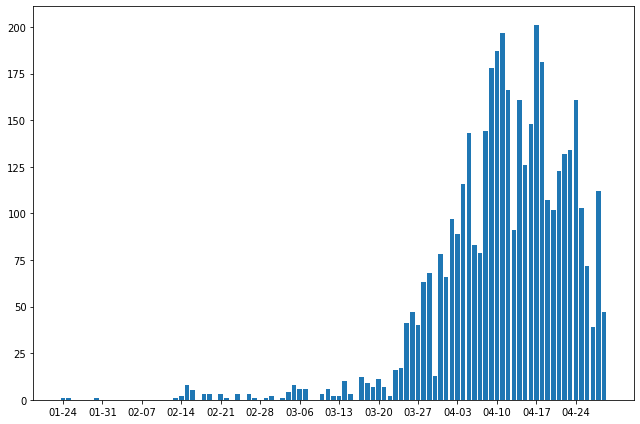

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,6))
plt.bar(date_data, dc_data)
ticks = 7
plt.xticks(range(0, len(date_data), ticks), date_data[::ticks])
fig.tight_layout()

[ToDo]東京都の移動平均線（7、14、21）

In [0]:
def sma(closeList=[], term=5):
    '''単純移動平均の計算'''
    return list(pd.Series(closeList).rolling(term).mean())

dma7_data = sma(dc_data,7)
dma14_data = sma(dc_data,14)
dma21_data = sma(dc_data,21)
print(dma7_data)
print(dma14_data)
print(dma21_data)

[nan, nan, nan, nan, nan, nan, 0.42857142857142855, 0.2857142857142857, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.42857142857142855, 1.5714285714285714, 2.2857142857142856, 2.2857142857142856, 2.7142857142857144, 3.142857142857143, 3.0, 3.142857142857143, 2.142857142857143, 1.4285714285714286, 1.8571428571428572, 1.4285714285714286, 1.4285714285714286, 1.5714285714285714, 1.1428571428571428, 1.1428571428571428, 1.4285714285714286, 1.0, 1.1428571428571428, 1.2857142857142858, 2.2857142857142856, 3.142857142857143, 3.857142857142857, 3.5714285714285716, 3.5714285714285716, 3.857142857142857, 4.142857142857143, 3.2857142857142856, 2.7142857142857144, 3.2857142857142856, 3.7142857142857144, 3.7142857142857144, 5.0, 5.428571428571429, 6.142857142857143, 7.428571428571429, 7.0, 6.857142857142857, 9.142857142857142, 9.857142857142858, 14.428571428571429, 20.142857142857142,

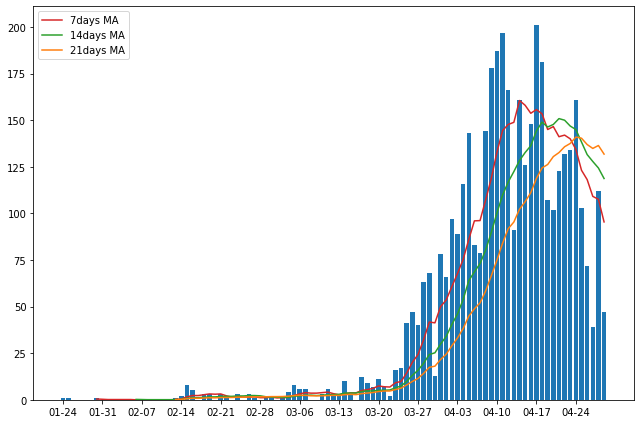

In [0]:
fig = plt.figure(figsize=(9,6))
plt.plot(date_data, dma7_data, c='C3', mew='3', label='7days MA')
plt.plot(date_data, dma14_data, c='C2', mew='3', label='14days MA')
plt.plot(date_data, dma21_data, c='C1', mew='3', label='21days MA')
plt.bar(date_data, dc_data)
plt.legend()
ticks = 7
plt.xticks(range(0, len(date_data), ticks), date_data[::ticks])
fig.tight_layout()


##東京都のMACD
* MACD = 短期EMA（12） – 長期EMA（26） 
* シグナル = MACDの指数平滑移動平均（9） 
* シグナルヒストグラム = MACD - シグナル


In [0]:
import numpy as np
def ema(closeList=[], term=5):
    '''指数平滑移動平均の計算'''
    return list(pd.Series(closeList).ewm(span=term).mean())
ema12_data = ema(dc_data,12)
ema26_data = ema(dc_data,26)
macd_data = list(np.array(ema12_data) - np.array(ema26_data))
signal_data = ema(macd_data,9)
macdhist_data = list(np.array(macd_data) - np.array(signal_data))


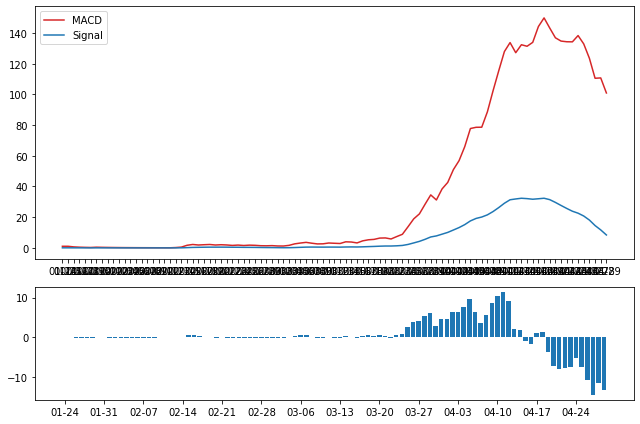

In [0]:
fig = plt.figure(figsize=(9,6))
ax1 = plt.subplot2grid((3,1), (0,0), rowspan=2)
ax2 = plt.subplot2grid((3,1), (2,0))
ax1.plot(date_data, ema12_data, c='C3', mew='3', label='MACD')
ax1.plot(date_data, signal_data, c='C0', mew='3', label='Signal')
ax1.legend()
ax2.bar(date_data, macdhist_data)
ticks = 7
plt.xticks(range(0, len(date_data), ticks), date_data[::ticks])
fig.tight_layout()

##東京都の倍日数
参考：[倍になるのはいつか](https://note.com/ogatahisato/n/nc72e01b64a7c)

* d/(logn(C2)-logn(C1))
  * d:経過日数
  * c:累計感染者数

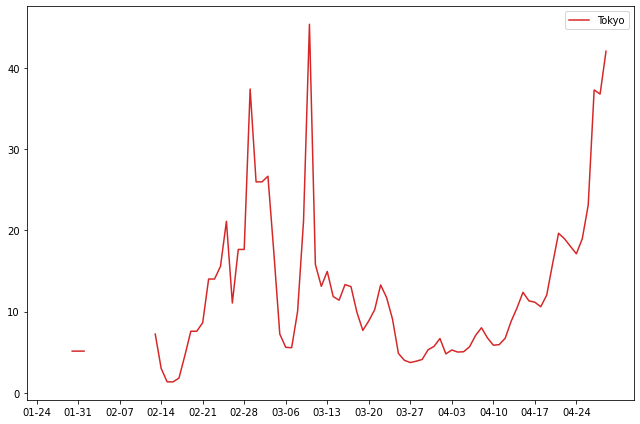

In [0]:
import math
def get_increase_pace(closeList=[], d=3, n=2):
    '''n倍になるのに要する日数の推移'''
    pace_list = []
    for i in range(len(closeList)):
      if i < d:
        pace_list.append(None)
      else:
        try:
          pace_list.append(float(d)/(math.log(closeList[i], n) - math.log(closeList[i-d], n)))
        except (ZeroDivisionError, ValueError):
          #pace_list.append(float('inf'))
          pace_list.append(None)
    return pace_list

def cumsumlist(closeList=[]):
    '''日時データから累計を算出'''
    return list(pd.Series(closeList).cumsum())

fig = plt.figure(figsize=(9,6))
plt.plot(date_data, get_increase_pace(cumsumlist(dc_data)), c='C3', mew='3', label='Tokyo')
plt.legend()
ticks = 7
plt.xticks(range(0, len(date_data), ticks), date_data[::ticks])
fig.tight_layout()

##日本、世界の情報で作成
* 各種データの取扱いは[ここ](https://oku.edu.mie-u.ac.jp/~okumura/python/COVID-19.html)がわかりやすい。

In [1]:
!wget --no-check-certificate --output-document=time_series_covid19_confirmed_global.csv https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

--2020-04-30 21:38:53--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85886 (84K) [text/plain]
Saving to: ‘time_series_covid19_confirmed_global.csv’

time_series_covid19 100%[===================>]  83.87K  --.-KB/s    in 0.02s   

2020-04-30 21:38:53 (5.38 MB/s) - ‘time_series_covid19_confirmed_global.csv’ saved [85886/85886]



In [0]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from dateutil.parser import parse

df = pd.read_csv('time_series_covid19_confirmed_global.csv')

g_datedata = [parse(i) for i in df.columns[4:]]
#g_c_data = [df.groupby('Country/Region')[i].sum() for i in df.columns[4:]]
g_c_data = [df.groupby('Country/Region')[i].sum() for i in df.columns[4:]]

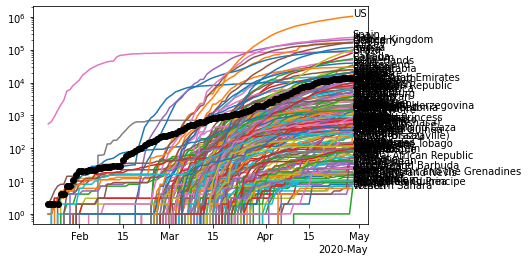

In [6]:
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.plot(t, x)
ax.set_yscale('log')

for i in x[-1].index:
    if x[-1][i] > 0:
        ax.text(t[-1], x[-1][i], i)

japan = [x[i]['Japan'] for i in range(len(x))]
ax.plot(t, japan, 'o-k')

fig.savefig('COVID-csse.svg', bbox_inches="tight")